In [1]:
import pandas as pd
import numpy as np
import os
path = 'C:/Users/delightb/Desktop/Final_Project/Senior-Project/Pickle'
####   = pd.read_pickle(os.path.join(path,'abvHouse.pkl'))

In [18]:
df = pd.read_pickle(os.path.join(path,'AN_Build.pkl'))
df = df[df['Year'] == '2001-01-01']
df = df[df['Area'] == 'W BOISE']


df.to_pickle('temp.pkl')
df.head()

,TAV,TAV_Ch,Architecture And Engineering Occupations,"Arts, Design, Entertainment, Sports, And Media Occupations",Building And Grounds Cleaning And Maintenance Occupations,Business And Financial Operations Occupations,Community And Social Service Occupations,Computer And Mathematical Occupations,Construction And Extraction Occupations,"Education, Training, And Library Occupations",...,Transportation And Material Moving Occupations,"(10000.0, 40000.0]","(40000.0, 70000.0]","(70000.0, 100000.0]","(100000.0, 150000.0]","(150000.0, 200000.0]","(200000.0, 300000.0]",Total_House_Change,Total_Pop_Change,Total_Emp_Change
54653,206700.0,0.308228,-0.11353,-0.091575,0.005284,-0.055439,-0.017606,-0.05814,-0.002198,-0.115068,...,-0.045546,-0.094749,0.302744,0.218329,0.0,0.0,0.0,0.034815,0.036376,-0.033423
54654,206700.0,0.246683,-0.11353,-0.091575,0.005284,-0.055439,-0.017606,-0.05814,-0.002198,-0.115068,...,-0.045546,-0.094749,0.302744,0.218329,0.0,0.0,0.0,0.034815,0.036376,-0.033423
54655,206700.0,0.246683,-0.11353,-0.091575,0.005284,-0.055439,-0.017606,-0.05814,-0.002198,-0.115068,...,-0.045546,-0.094749,0.302744,0.218329,0.0,0.0,0.0,0.034815,0.036376,-0.033423
54656,206700.0,0.333548,-0.11353,-0.091575,0.005284,-0.055439,-0.017606,-0.05814,-0.002198,-0.115068,...,-0.045546,-0.094749,0.302744,0.218329,0.0,0.0,0.0,0.034815,0.036376,-0.033423
55146,46800.0,0.000000,-0.11353,-0.091575,0.005284,-0.055439,-0.017606,-0.05814,-0.002198,-0.115068,...,-0.045546,-0.094749,0.302744,0.218329,0.0,0.0,0.0,0.034815,0.036376,-0.033423


In [28]:
def trim(df):
    dfQ1 = df['TAV'].quantile(0.25)
    dfQ3 = df['TAV'].quantile(0.75)
    df_iqr = dfQ3 - dfQ1
    iqrMax =dfQ3 + (1.5*df_iqr)
    iqrMin = dfQ1 - (1.5*df_iqr)
    df_trim = df[(df['TAV']<iqrMax) & (df['TAV'] > iqrMin)]
    #df_trim = df.drop(columns=['TAV'])
    
    return df_trim


In [29]:
def coefComp(df):
    k = 11
    df_Fun = df.copy()
    df_Fun = df_Fun.drop(columns = 'TAV')
    #df_Fun = df_Fun[df_Fun['Area'] == area]
    corrmat = df_Fun.corr()
    cols = corrmat.nlargest(k, 'TAV_Ch')['TAV_Ch']
    temp = pd.DataFrame(cols)

    return temp

In [22]:
def TcoefComp(df):
    k = 11
    df_Fun = df.copy()
    #df_Fun = df_Fun[df_Fun['Area'] == area]
    df_Fun = trim(df_Fun)
    corrmat = df_Fun.corr()
    cols = corrmat.nlargest(k, 'TAV_Ch')['TAV_Ch']
    temp = pd.DataFrame(cols)

    return temp

In [30]:
df = pd.read_pickle('temp.pkl')

test = coefComp(df)
test


,TAV_Ch
TAV_Ch,1.000000e+00
Legal Occupations,8.139265e-16
"(70000.0, 100000.0]",7.421931e-16
Healthcare Practitioner And Technical Occupations,6.940098e-16
"Life, Physical, And Social Science Occupations",6.693864e-16
"Farming, Fishing, And Forestry Occupations",4.264021e-16
Architecture And Engineering Occupations,3.964447e-16
Production Occupations,3.764323e-16
Computer And Mathematical Occupations,3.725894e-16
"(10000.0, 40000.0]",3.441986e-16


In [32]:
df = pd.read_pickle('temp.pkl')
df =trim(df)

test = coefComp(df)
test

,TAV_Ch
TAV_Ch,1.000000e+00
"Arts, Design, Entertainment, Sports, And Media Occupations",1.048726e-15
Food Preparation And Serving Related Occupations,1.022141e-15
Community And Social Service Occupations,1.008458e-15
Production Occupations,6.588645e-16
"(40000.0, 70000.0]",6.474641e-16
Healthcare Support Occupations,5.569667e-16
Transportation And Material Moving Occupations,4.303845e-16
Management Occupations,3.609021e-16
Total_Pop_Change,3.464360e-16


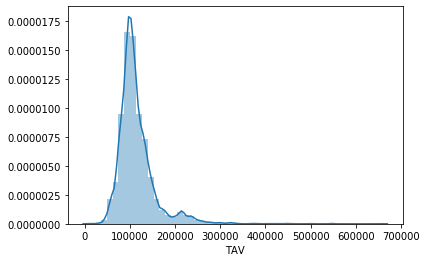

In [8]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


df = pd.read_pickle('temp.pkl')


plt =sns.distplot(df['TAV'])

plt


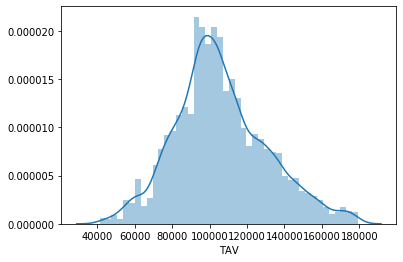

In [13]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


df = pd.read_pickle('temp.pkl')

df = trim(df)

plt =sns.distplot(df['TAV'])

plt
